GPU support =  False

size 544


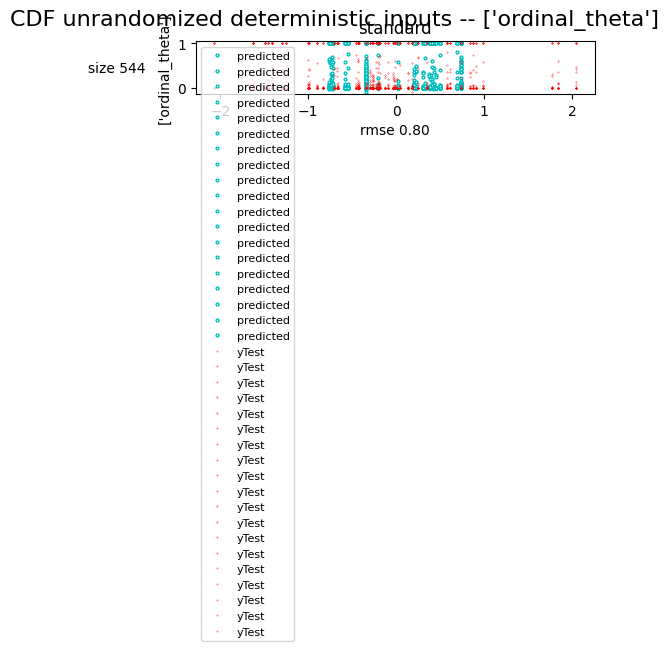

In [3]:
###
### 0. Import packages and references
###
### Import framework
import os
mainDirectory = os.path.abspath(os.path.join(os.getcwd() , '..', '..','..'))
packageFile = os.path.abspath(os.path.join(mainDirectory, 'montecarlolearning', 'packages.py'))
exec(open(packageFile).read())

###
### 1. Training data Generator/Importer
###

# 10^4 data data points
Generator = DataImporter()
Generator.set_path('C:\\dev\\MonteCarloLearning\\src\\socialScience\\second_NN_new.csv')
Generator.set_inputName(['active','mean_dist_stanlag','dist_capital_stanlag','ch_dist_capital_stanlag','territorial','government','osk_a_stanlag','osk_b_stanlag','closed_aut','elect_aut','elect_dem','lib_dem','ln_brd_lag','low_intlev','high_intlev','internationalised','infmorMA_nn','frac_std','y_active_std'])
Generator.set_outputName(['ordinal_theta'])
Generator.set_trainTestRatio(0.9)
Generator.set_trainingSetSizes([544])

###
### 2. Set Nueral network structure / Hyperparameters
### 

Regressor = Neural_Approximator()
Regressor.set_Generator(Generator)
Regressor.set_hiddenNeurons(20)
Regressor.set_hiddenLayers(10)
Regressor.set_activationFunctionsHidden([tf.nn.tanh])
Regressor.set_activationFunctionOutput(tf.nn.relu)
Regressor.set_weight_seed(1)
Regressor.set_biasNeuron(True)

###
### 2. Set Nueral network structure / Hyperparameters
### 

TrainSettings = TrainingSettings()
TrainSettings.set_epochs(50)
TrainSettings.set_learning_rate_schedule([(0.0, 0.05), (0.2, 0.025), (0.4, 0.025), (0.6, 0.02), (0.8, 0.02)])
TrainSettings.set_batches_per_epoch(10)
TrainSettings.set_min_batch_size(150)

###
### 3. Train network and Study results
### Comment: For different trainingSetSizes the neural network reset and not saved, hence train and evaluation of yPredicted are done together currently
###
xTest, yTest, yPredicted = train_and_test(Generator, Regressor, TrainSettings)
plot_results("CDF unrandomized deterministic inputs", yPredicted, xTest, yTest, Generator)